In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

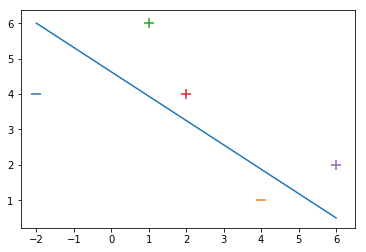

In [2]:
#Input data = [X val, Y val, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

# Associated output labels
# First 2 are labeled -1 and last 3 are 1
y = np.array([-1,-1,1,1,1])

for d, sample in enumerate(X):
    # Plot the negative samples (first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)

# Print a possible hyperplane that seperates two lines
plt.plot([-2,6],[6,0.5])

In [3]:
# lambda = 1/epoch

# for epoch in range(epoch)
#     1. if y * (x.w) < 1 - missclassification
#     2. Inside if w = w + alpha * (yi*xi - 2*lambda*w)
#     3. else correct classification
#     4. w = w + alpha * (-2*lambda*w)

def svm_gd_plot(X, Y):
    w = np.zeros(len(X[0]))  # Weight vector with zeros
    eta = 1  # Learning rate
    epochs = 100000
    errors = []
    
    for epoch in range(1, epochs):
        error = 0
        
        for i, x in enumerate(X):
            # misclassification
            if(Y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ((X[i] * Y[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                # Correct Classification
                w = w + eta * (-2 * (1/epoch) * w)
        errors.append(error)
    
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
#     plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

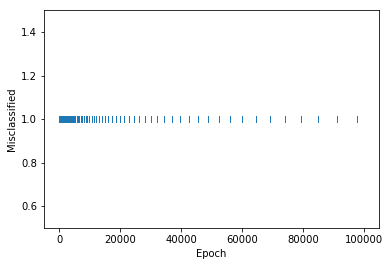

In [4]:
w = svm_gd_plot(X,y)

In [5]:
w

array([  1.58876117,   3.17458055,  11.11863105])

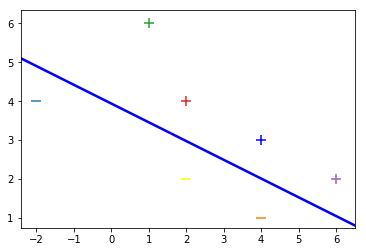

In [5]:
for d, sample in enumerate(X):
    
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1,color='blue')